In [83]:
import pandas as pd
import numpy as np
import sweetviz as sv

In [84]:
#cargando los datos
df = pd.read_csv("PATIENTS.csv")

In [94]:
#analizando el Dataset
df_report = sv.analyze(df)

c:\Users\Ale\Anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Ale\Anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: row_id                              |▌         | [  6%]   00:00 -> (00:00 left)c:\Users\Ale\Anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: subject_id                          |█▏        | [ 12%]   00:12 -> (01:32 left)c:\Users\Ale\Anaconda3\lib\


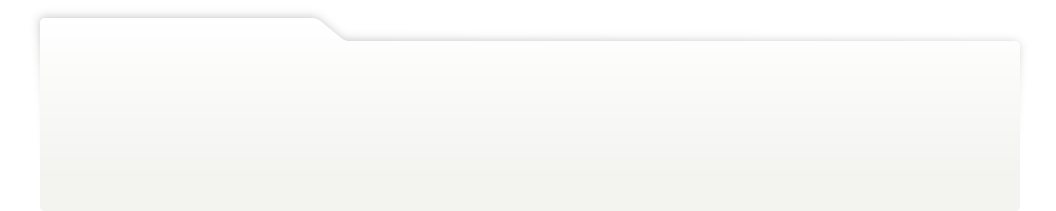
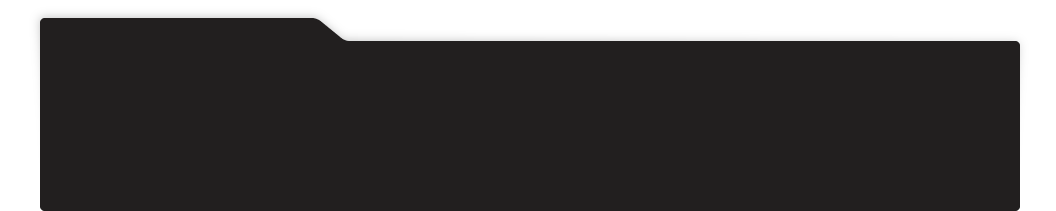
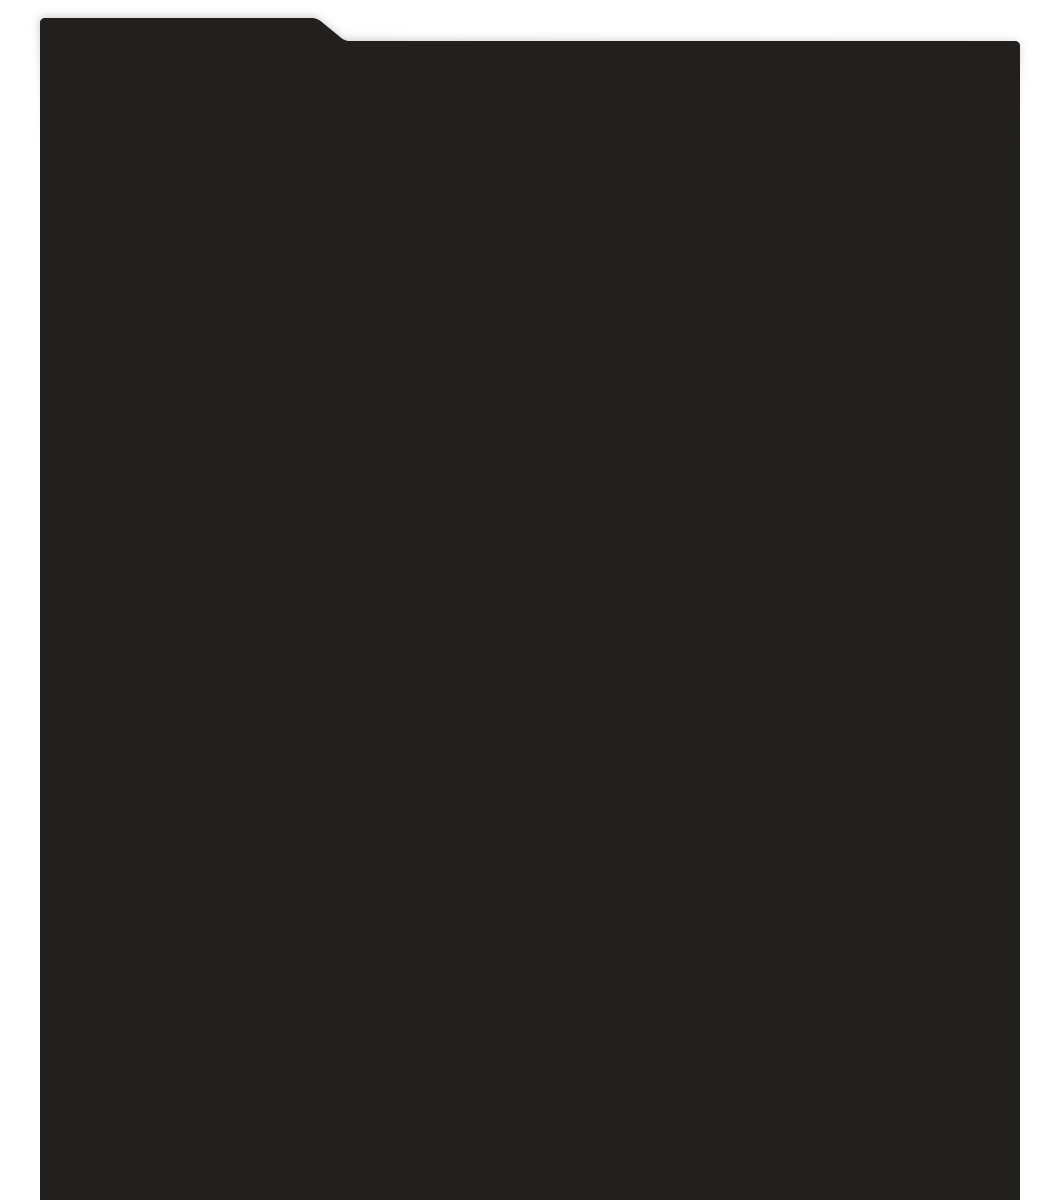
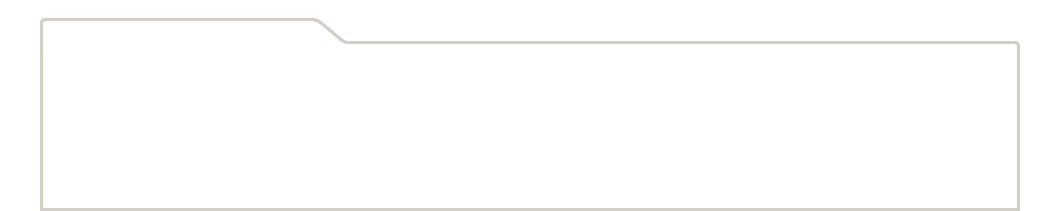
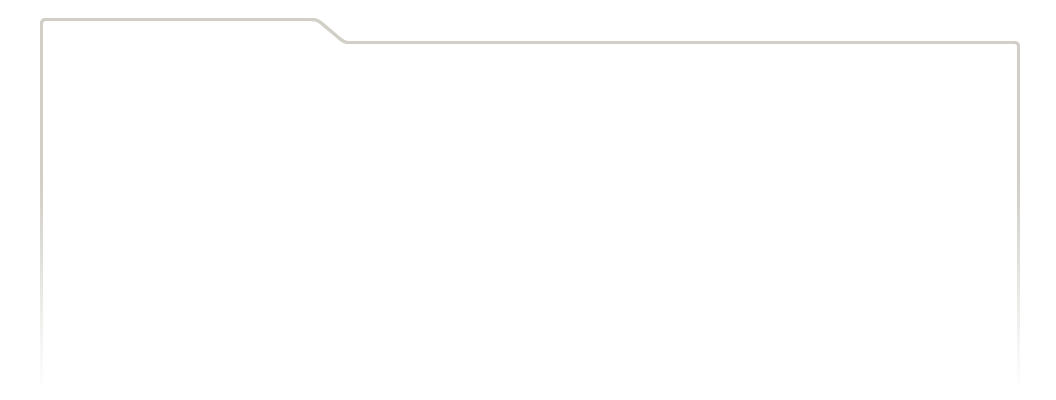
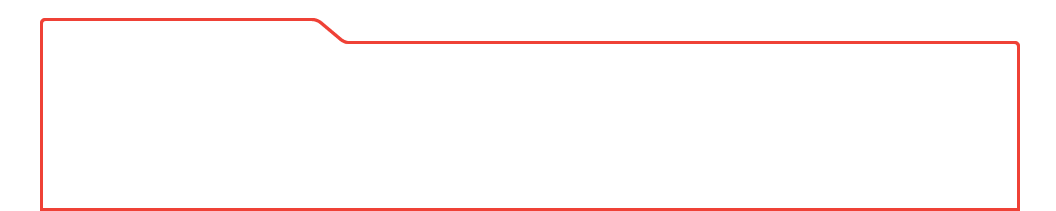
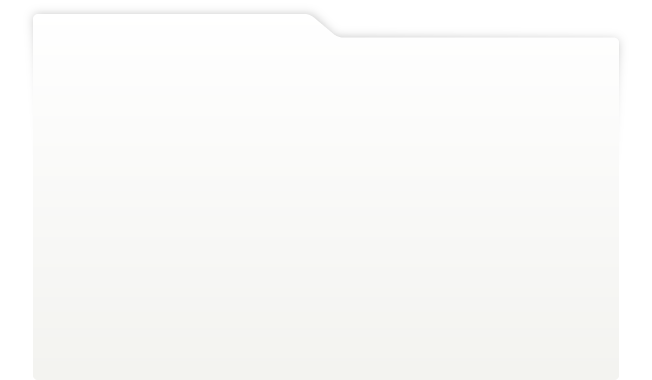
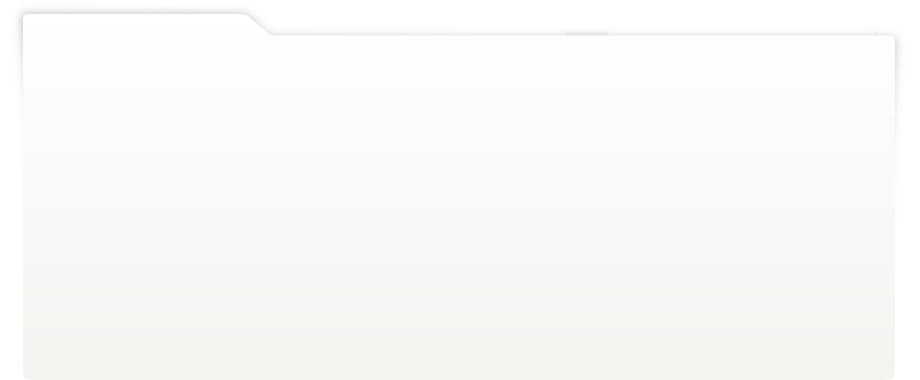
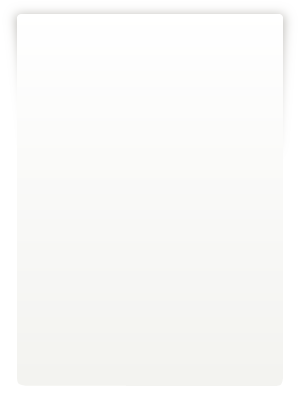
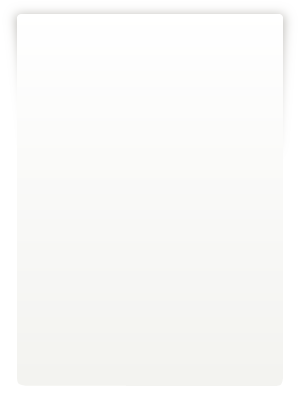
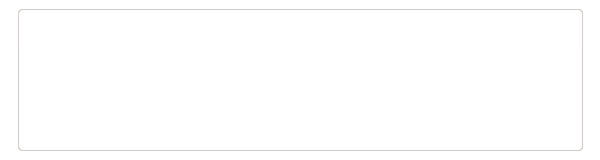
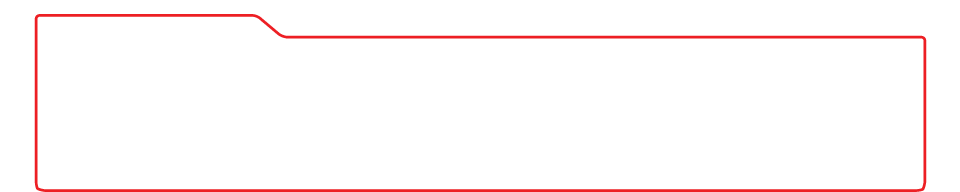
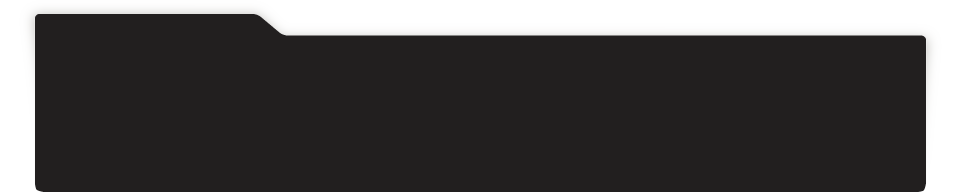
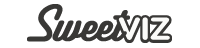
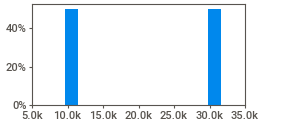
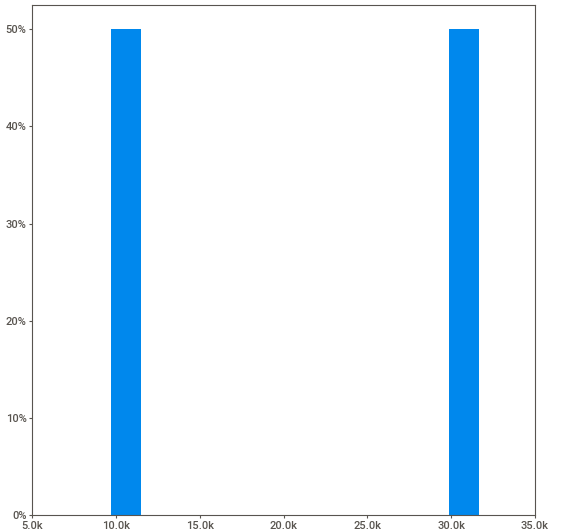
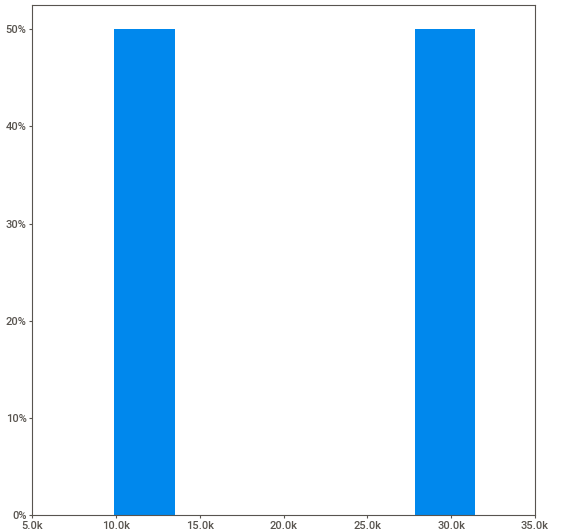
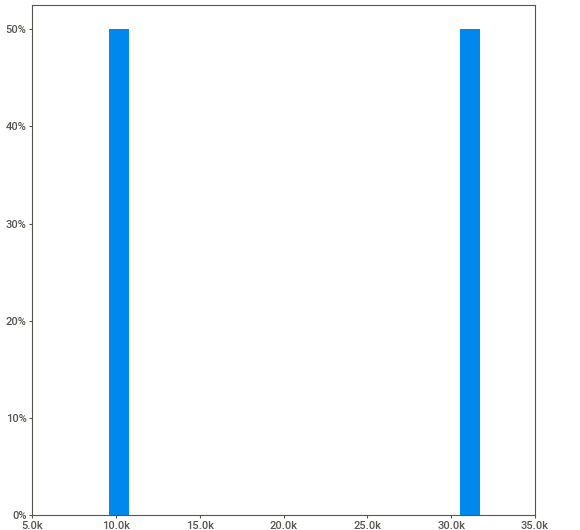
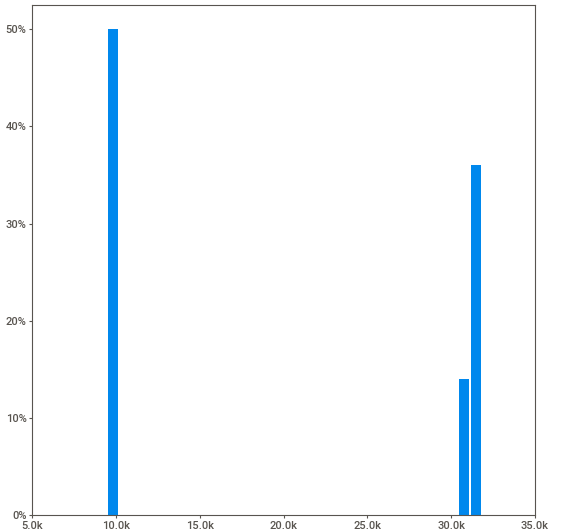
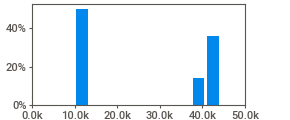
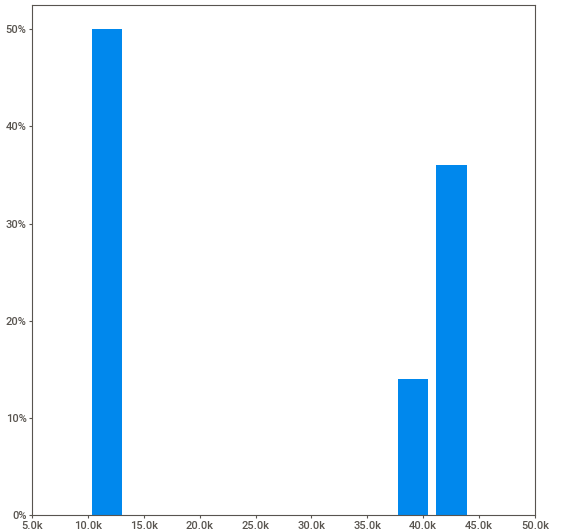
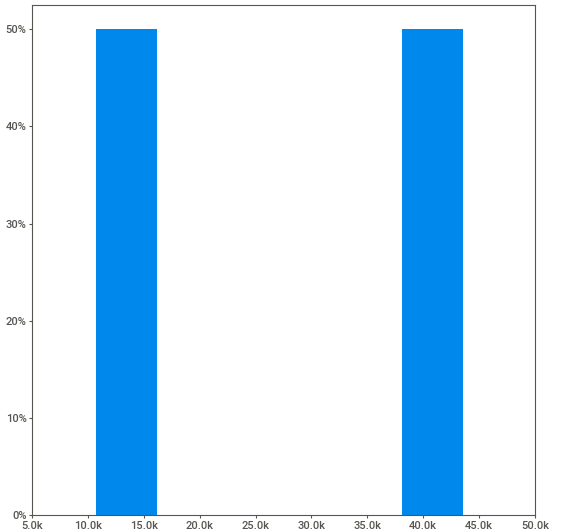
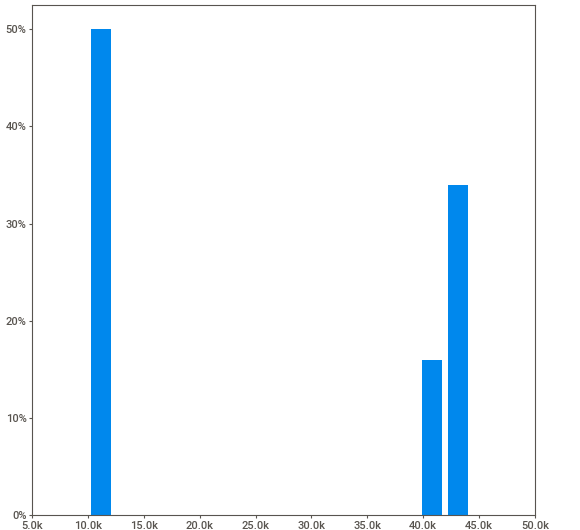
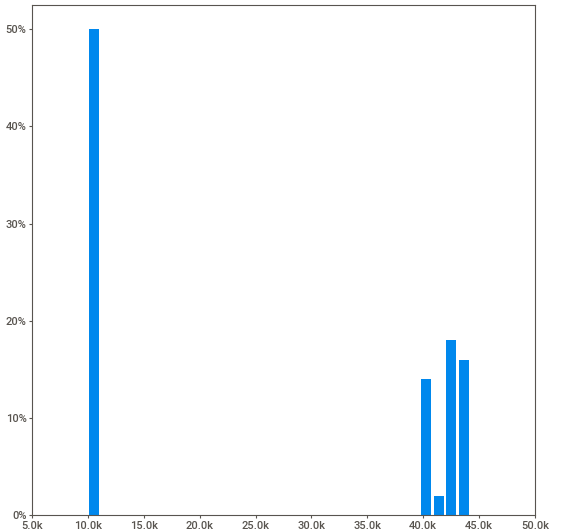
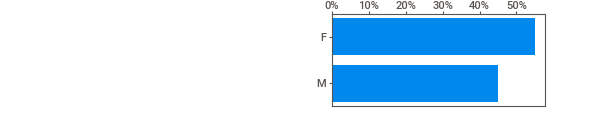
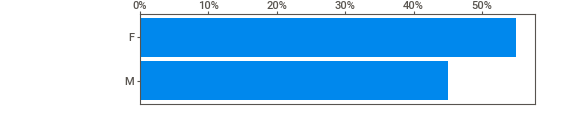
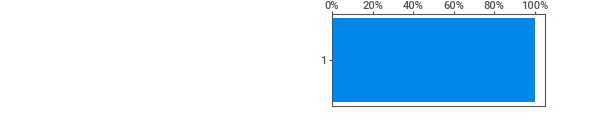
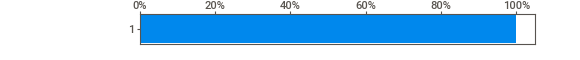
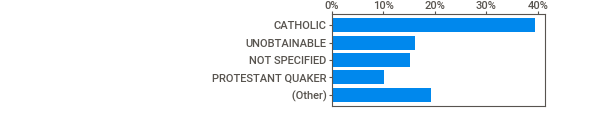
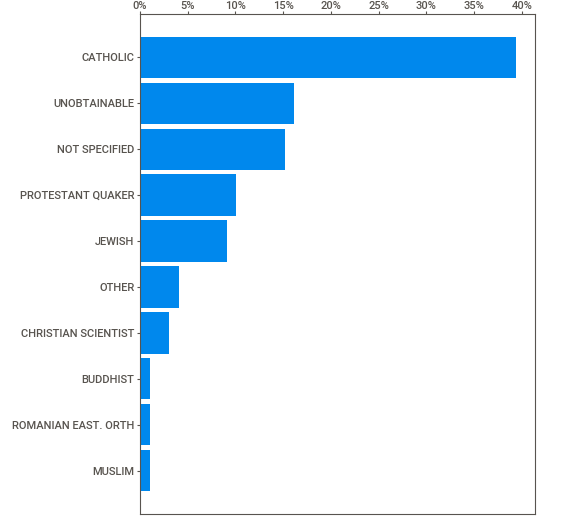
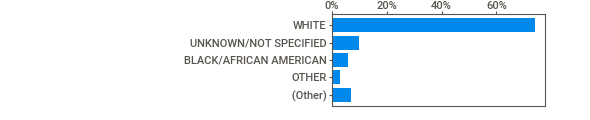
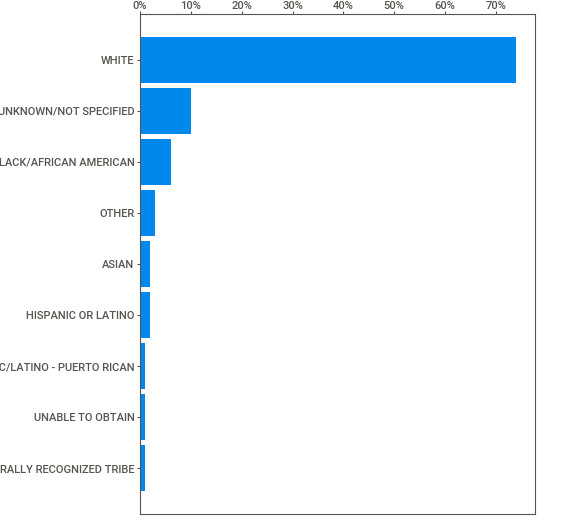
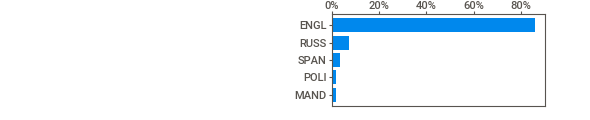
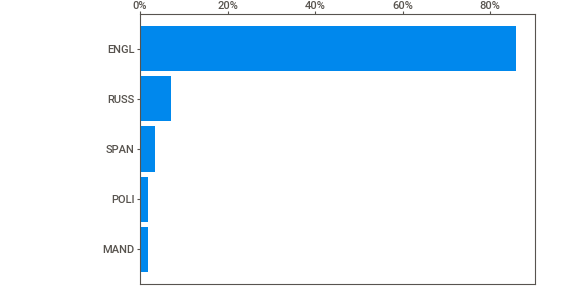
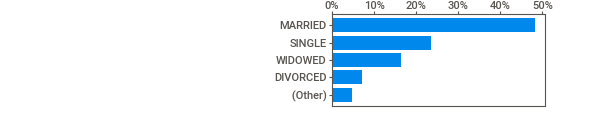
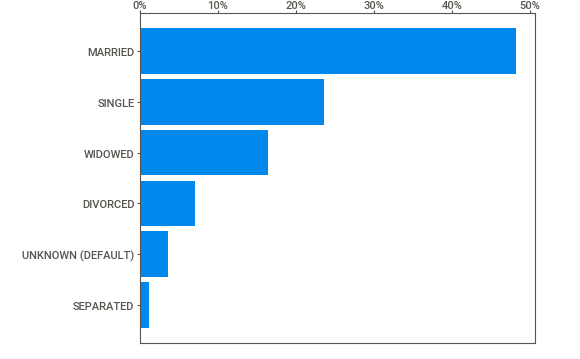
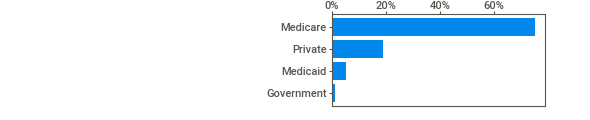
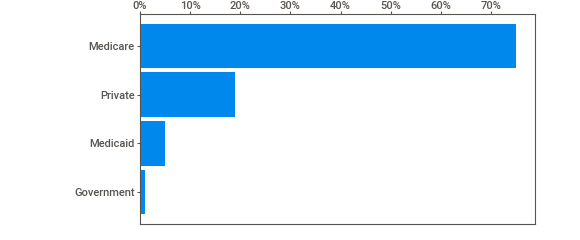
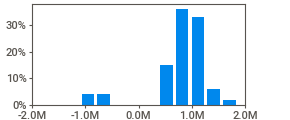
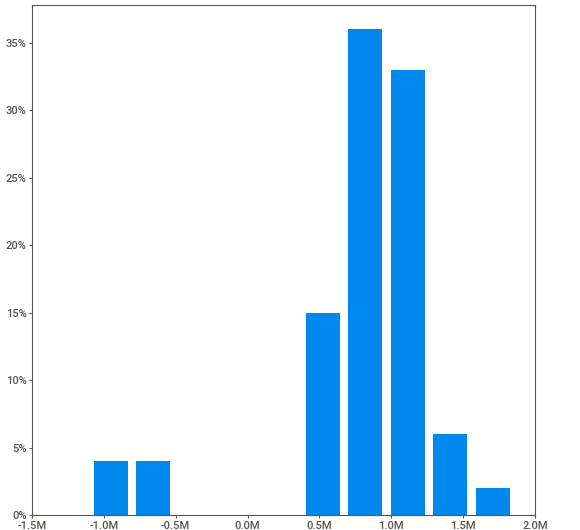
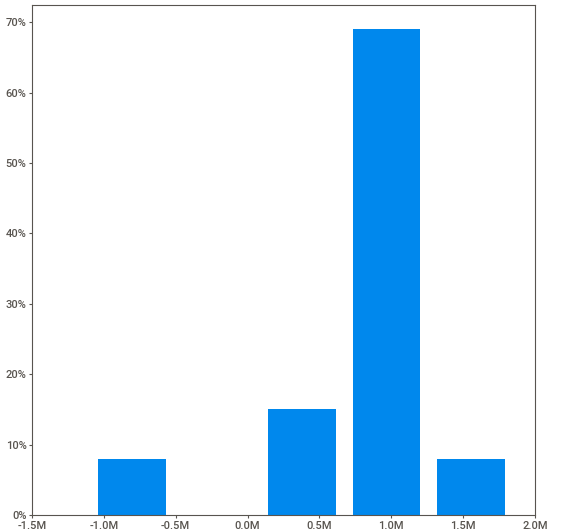
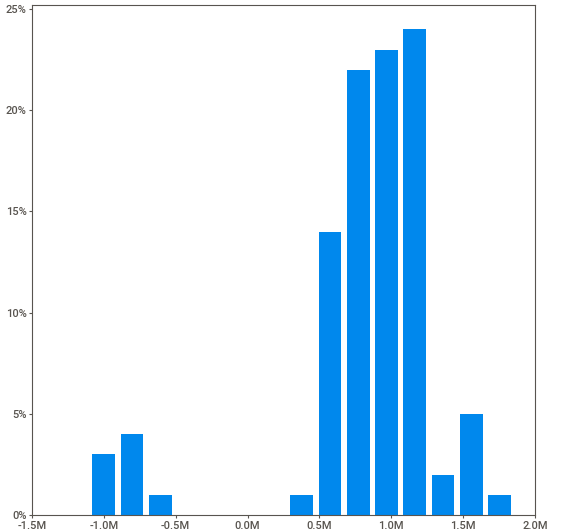
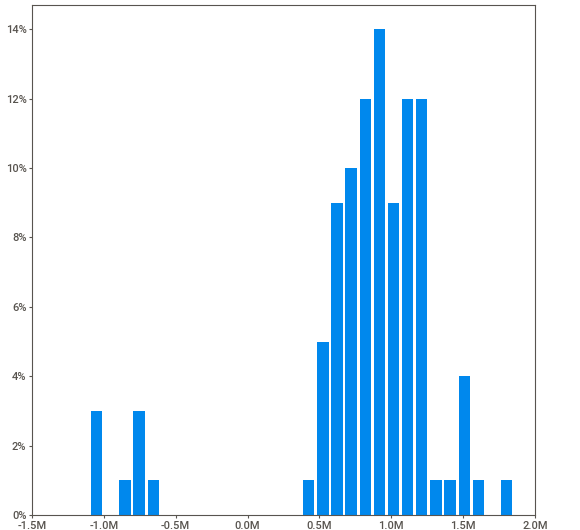
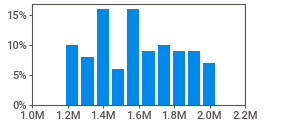
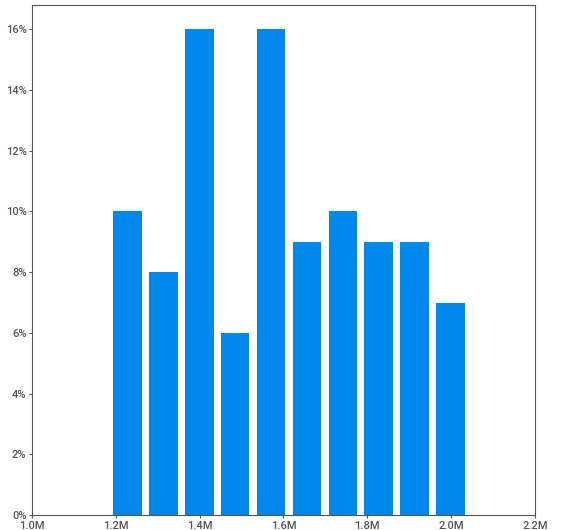
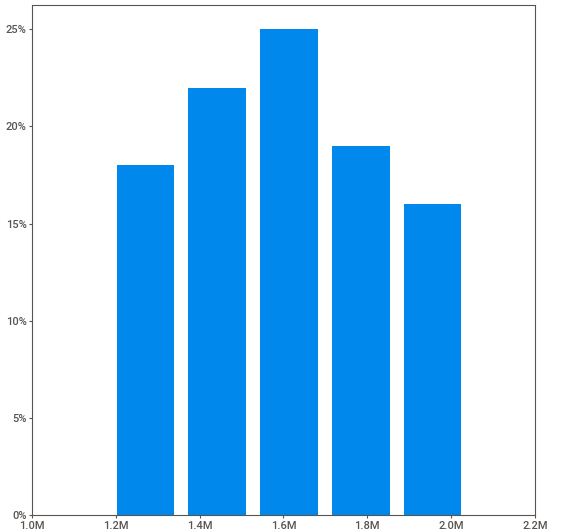
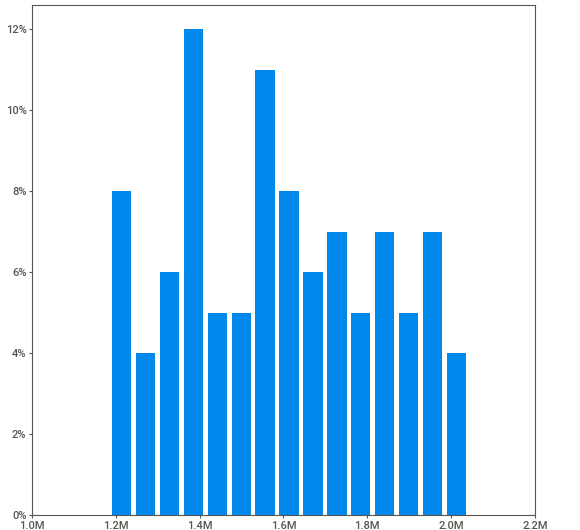
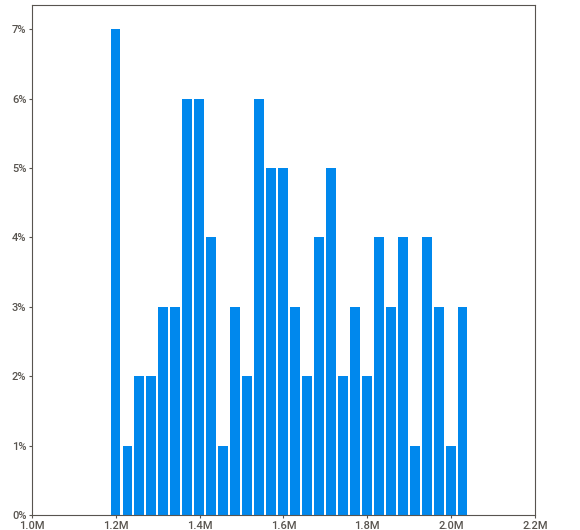
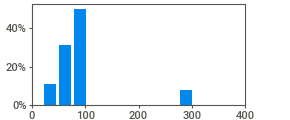
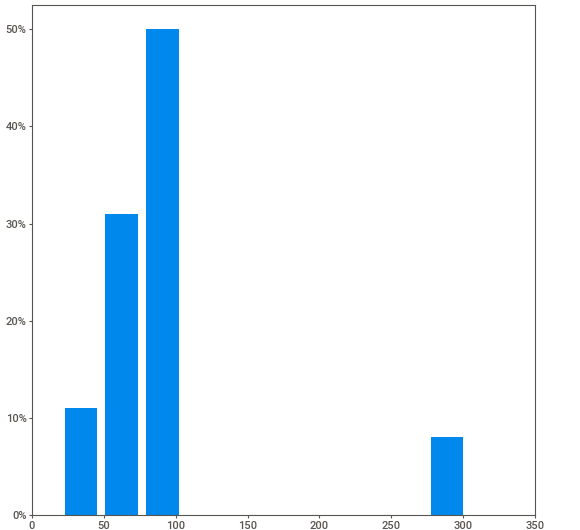
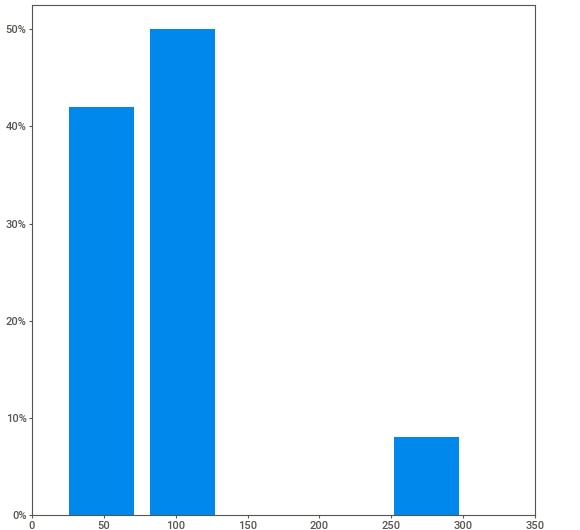
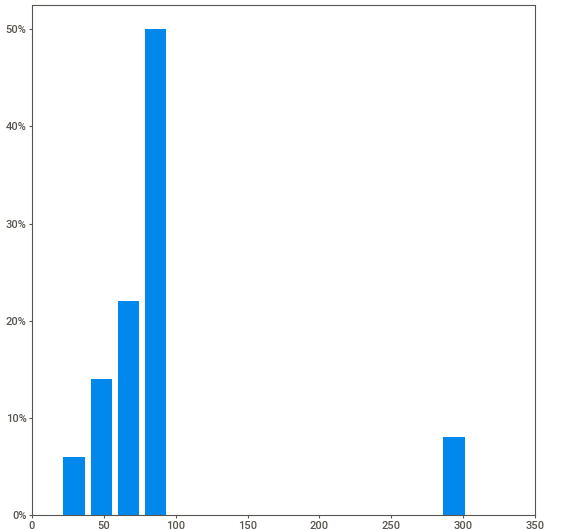
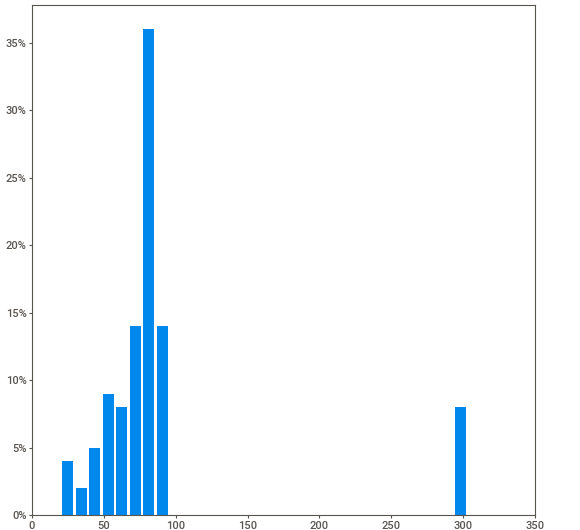
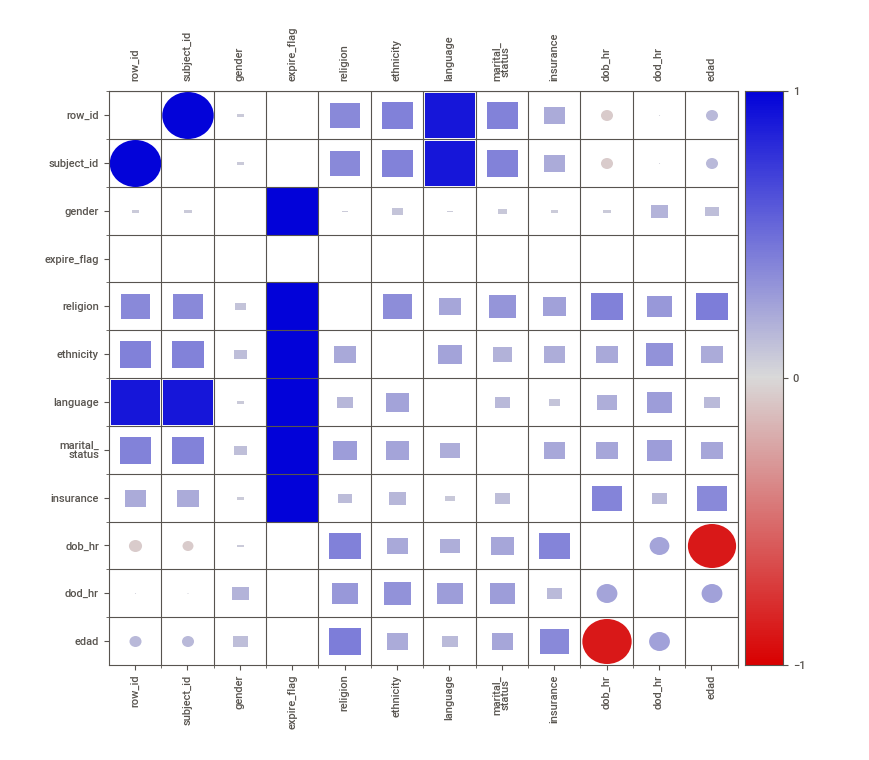
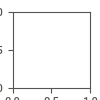

In [95]:
df_report.show_notebook()

In [87]:
df.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


**Conclusiones**

1 . Los valores de de ID empiezan con 1 o con 3 lo que puede suponer una diferenciacion entre los registros

2 . Los valores de de ID empiezan con 1 o con 4 lo que puede suponer una diferenciacion entre pacientes

3 . Las mujeres sobrepasan a los hombres por 10 puntos porcentuales en el dataset

8 . Todos los pacientes están muertos.

---

**ETL Sugerido**

* Pasar las columnas ["religion", "ethnicity", "language", "marital_status", "Insurance"] de la tabla ADMISSIONS a la tabla PATIENTS

* Sacar la edad del paciente

* Agregar los pacientes no muertos

### **ETL**

In [88]:
# Cargar los datos
df2 = pd.read_csv("ADMISSIONS.csv")

# Convertir fechas a tipo datetime
df2['admittime'] = pd.to_datetime(df2['admittime'])
df2['dischtime'] = pd.to_datetime(df2['dischtime'])

# Obtener la fecha de salida más reciente para cada usuario
fecha_reciente = df2.groupby('subject_id')['dischtime'].max().reset_index()

# Fusionar los resultados con el DataFrame original para obtener los registros más recientes para cada usuario
df_actual = pd.merge(df2, fecha_reciente, on=['subject_id', 'dischtime'])

In [89]:
df = pd.merge(df, df_actual[["subject_id", "religion", "ethnicity", "language", "marital_status", "insurance"]], on = ["subject_id"])
df.drop(columns=["dod_hosp", "dod_ssn"])

,row_id,subject_id,gender,dob,dod,expire_flag,religion,ethnicity,language,marital_status,insurance
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,1,CATHOLIC,BLACK/AFRICAN AMERICAN,NaN,SEPARATED,Medicare
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,NaN,SINGLE,Private
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,NaN,NaN,Medicare
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,1,CATHOLIC,WHITE,NaN,DIVORCED,Medicare
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,1,CATHOLIC,WHITE,NaN,DIVORCED,Medicare
...,...,...,...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,1,CATHOLIC,WHITE,ENGL,SINGLE,Private
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,1,PROTESTANT QUAKER,WHITE,ENGL,MARRIED,Medicare
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,1,UNOBTAINABLE,BLACK/AFRICAN AMERICAN,ENGL,SINGLE,Medicare
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,1,CATHOLIC,WHITE,ENGL,SINGLE,Medicare


In [93]:
df['dob'] = pd.to_datetime(df['dob'])
df['dod'] = pd.to_datetime(df['dod'])
# obtener la marca de tiempo en segundos
df['dob_hr'] = df['dob'].apply(lambda x: x.timestamp()) / 3600
df['dod_hr'] = df['dod'].apply(lambda x: x.timestamp()) / 3600

# Sacar columna edad
df['edad'] = round((df['dod_hr'] - df["dob_hr"]) / (365 * 24))
df

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,religion,ethnicity,language,marital_status,insurance,dob_hr,dod_hr,edad
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12 00:00:00,2165-08-12 00:00:00,1,CATHOLIC,BLACK/AFRICAN AMERICAN,NaN,SEPARATED,Medicare,1088496.0,1714704.0,71.0
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28 00:00:00,NaN,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,NaN,SINGLE,Private,1055640.0,1373208.0,36.0
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07 00:00:00,2125-10-07 00:00:00,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,NaN,NaN,Medicare,601968.0,1365408.0,87.0
3,9478,10017,F,2075-09-21,2152-09-12,NaN,2152-09-12 00:00:00,1,CATHOLIC,WHITE,NaN,DIVORCED,Medicare,926736.0,1601496.0,77.0
4,9479,10019,M,2114-06-20,2163-05-15,2163-05-15 00:00:00,2163-05-15 00:00:00,1,CATHOLIC,WHITE,NaN,DIVORCED,Medicare,1266360.0,1695024.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15,2114-02-20,2114-02-20 00:00:00,2114-02-20 00:00:00,1,CATHOLIC,WHITE,ENGL,SINGLE,Private,770280.0,1263480.0,56.0
96,31853,44154,M,1878-05-14,2178-05-15,2178-05-15 00:00:00,2178-05-15 00:00:00,1,PROTESTANT QUAKER,WHITE,ENGL,MARRIED,Medicare,-803256.0,1826520.0,300.0
97,31867,44212,F,2078-06-16,2124-01-29,NaN,2124-01-29 00:00:00,1,UNOBTAINABLE,BLACK/AFRICAN AMERICAN,ENGL,SINGLE,Medicare,950712.0,1350600.0,46.0
98,31870,44222,M,2107-06-27,2182-08-03,2182-08-03 00:00:00,NaN,1,CATHOLIC,WHITE,ENGL,SINGLE,Medicare,1205160.0,1863504.0,75.0
